 # GRAPHING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('tab10')
sns.set_context("paper")

In [2]:
entropy_states = [[] for i in range(7)]
error_states = [[] for i in range(7)]
entropy_transitions = [[] for i in range(7)]
error_transitions = [[] for i in range(7)]
complexity_states = [[] for i in range(7)]
error_complexity_states = [[] for i in range(7)]
complexity_transitions = [[] for i in range(7)]
error_complexity_transitions = [[] for i in range(7)]

In [3]:
for b in range(2,9):
    for _ in np.arange(1,5.2,0.2):
        k = "{:.2f}".format(_)
        df_entropy = pd.read_csv('/Users/octavio/Downloads/Experiment/Base_'+str(b)+'/base/'
                         +str(k)+'_entropy', names=['entropy', 'error'])
        df_transition_entropy = pd.read_csv('/Users/octavio/Downloads/Experiment/Base_'+str(b)+'/base/'
                         +str(k)+'_transition_entropy', names=['entropy', 'error'])
        df_complexity = pd.read_csv('/Users/octavio/Downloads/Experiment/Base_'+str(b)+'/base/'
                         +str(k)+'_complexity', names=['entropy', 'error'])
        df_transition_complexity = pd.read_csv('/Users/octavio/Downloads/Experiment/Base_'+str(b)+'/base/'
                         +str(k)+'_transition_complexity', names=['entropy', 'error'])
        entropy_states[b-2].append((df_entropy["entropy"].mean()*np.log(b))/np.log(2))
        error_states[b-2].append((df_entropy["error"].mean()*(np.log(b)**2)/(np.log(2)**2) ) /np.sqrt(64))
        entropy_transitions[b-2].append(df_transition_entropy["entropy"].mean())
        error_transitions[b-2].append(df_transition_entropy["error"].mean()/np.sqrt(64))
        complexity_states[b-2].append((df_complexity["entropy"].mean()*np.log(b))/np.log(2))
        error_complexity_states[b-2].append(df_complexity["error"].mean()/np.sqrt(64))
        complexity_transitions[b-2].append(df_transition_complexity["entropy"].mean())
        error_complexity_transitions[b-2].append(df_transition_complexity["error"].mean()/np.sqrt(64))

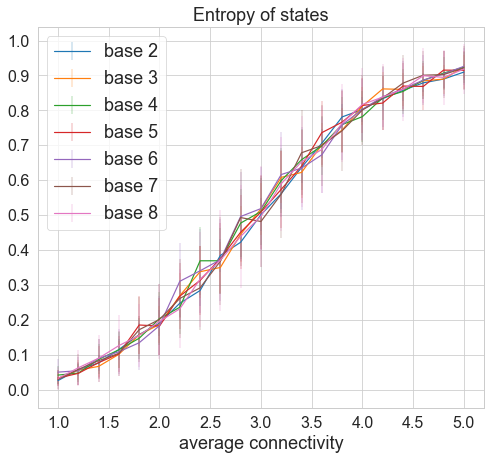

In [5]:
plt.figure(figsize=(8,7))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
for base in range(len(entropy_states)):
    #plt.plot(np.arange(1,5.2,0.2), entropy_states[base], label='base '+str(base+2))
    plt.errorbar(np.arange(1,5.2,0.2), entropy_states[base], yerr=error_states[base],
                 label='base '+str(base+2), elinewidth=0.35)
plt.xlabel("average connectivity", fontsize=18)
plt.title("Entropy of states", fontsize=18)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0],[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0])
plt.legend(fontsize=18)
#plt.savefig('entropy.png')

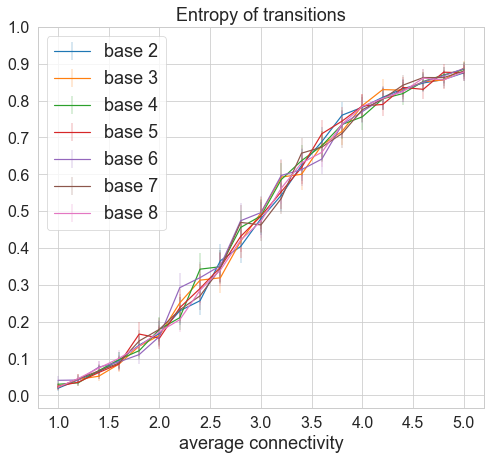

In [6]:
plt.figure(figsize=(8,7))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
for base in range(len(entropy_transitions)):
    #plt.plot(np.arange(1,5.2,0.2), entropy_transitions[base], label='base '+str(base+2))
    plt.errorbar(np.arange(1,5.2,0.2), entropy_transitions[base], yerr=error_transitions[base],
                 label='base '+str(base+2),  elinewidth=0.35)
plt.xlabel("average connectivity", fontsize=18)
plt.title("Entropy of transitions", fontsize=18)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0],[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0])
plt.legend(fontsize=18)
#plt.savefig('transitions.png')

In [ ]:
plt.figure(figsize=(8,7))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
for base in range(len(complexity_states)):
    plt.plot(np.arange(1,5.2,0.2), complexity_states[base], label='base '+str(base+2))
    #plt.errorbar(np.arange(1,5.2,0.2), complexity_states[base], yerr=error_complexity_states[base],
     #            label='base '+str(base+2), elinewidth=0.35)
plt.xlabel("average connectivity", fontsize=18)
plt.title("Complexity of states", fontsize=18)
plt.legend(fontsize=18)
#plt.savefig('complexity.png')

In [ ]:
plt.figure(figsize=(8,7))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
for base in range(len(complexity_transitions)):
    #plt.plot(np.arange(1,5.2,0.2), complexity_transitions[base], label='base '+str(base+2))
    plt.errorbar(np.arange(1,5.2,0.2), complexity_transitions[base], yerr=error_complexity_transitions[base],
                 label='base '+str(base+2), elinewidth=0.35)
plt.xlabel("average connectivity", fontsize=18)
plt.title("Complexity of transitions", fontsize=18)
#plt.yticks([0.0,0.2,0.4,0.6,0.8],[])
plt.legend(fontsize=18, loc='upper left')
plt.savefig('transitions_complexity.png')

In [14]:
import numpy as np
def plogp(p, base):
    p = np.ma.array(p, mask=(p<=0))
    return -p * np.log2(p, where=(p.mask==False)) / np.log2(base)

In [17]:
4*(plogp(1/4, 4))

1.0